# Quora Question Pair Similarity

<p style = 'font-size:17px'><b> Identifying Quora Question Pairs that have the same intent</b><br><br>
We will follow the steps mentioned below: <br>

1. Data Loading <br>
2. Analyze the data <br>
3. Data Preprocessing <br>
5. Split the data into train-test<br>
4. Data Preparation or Feature Engineering<br>
    <ul><li>Vectorize using BoW , Tf-Idf , Word2vec</li></ul><bbr>
5. Train the Model using ML Algorithm


In [422]:
!conda install -y gdown

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [423]:
!gdown --id 1yH4tmM_NC51QYYfFwuj9hiKNikzHjiDk


Downloading...
From: https://drive.google.com/uc?id=1yH4tmM_NC51QYYfFwuj9hiKNikzHjiDk
To: /kaggle/working/quora.csv
15.7MB [00:00, 149MB/s]


### Importing Necessary Libraries

In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1. Load the data

In [425]:
df = pd.read_csv('./quora.csv')
df.head()

,Unnamed: 0,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,1,368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,2,70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,3,226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,4,73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [426]:
df.shape

(100000, 8)

In [427]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate'],
      dtype='object')

### 2. Analyze the data

In [428]:
# As our task is to indentify duplicate questions, so we can consider only the follwing 3 columns

df = df.loc[:19999, ['question1', 'question2', 'is_duplicate']]

df.shape

(20000, 3)

In [429]:
df.head()

,question1,question2,is_duplicate
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,How close we are to see 3rd world war?,How close is a World War III?,1


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question1     20000 non-null  object
 1   question2     20000 non-null  object
 2   is_duplicate  20000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [431]:
df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

In [432]:
df.duplicated().sum()

0

#### Checking the no of questions which has asked more than 10 times
#### For question 1

In [433]:
print('Total unique question1 :', df["question1"].nunique())

df['question1'].value_counts()

Total unique question1 : 19228


How do you make easy money online?                                                                             6
How do I make money from home?                                                                                 6
How did you learn to speak English?                                                                            5
What is the Sahara, and how do the average temperatures there compare to the ones in the Taklamakan Desert?    5
How do I flow traffic to my website?                                                                           5
                                                                                                              ..
What are internet speeds like on planes?                                                                       1
What is mobile number?                                                                                         1
What are sneezes?                                                                               

In [434]:
v = df['question1'].value_counts()
count = 0
for i in v:
    if i == 9:
        print('for question1',count)
        break
    count = count + 1

#### For Question2

In [436]:
print('Total unique question2 :', df["question2"].nunique())

df['question2'].value_counts()

Total unique question2 : 19137


How can I become fluent in English?             7
What's the easiest way to make money online?    6
How do you cope with anxiety?                   6
What are the best ways to lose weight?          6
Is there any easy way to make money online?     5
                                               ..
Does the spirit world really exist?             1
What recipes use cornstarch?                    1
Is our universe just a computer simulation?     1
How do I lose 10 kgs in a month?                1
What is an emerging market?                     1
Name: question2, Length: 19137, dtype: int64

In [421]:
# !pip install wordcloud

In [437]:
v = df['question2'].value_counts()
count = 0
for i in v:
    if i == 9:
        print('for question2',count)
        break
    count = count + 1

In [438]:
df['is_duplicate'].value_counts()

0    12606
1     7394
Name: is_duplicate, dtype: int64

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

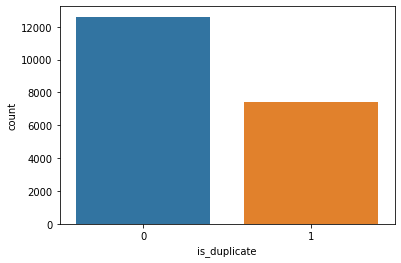

In [439]:
sns.countplot(x='is_duplicate',data=df)

### 3. Data Preprocessing

<p style = 'font-size:17px'>   Preprocessing Steps --<br>
<ul>
<li>Remove special characters</li>
<li>Covert sentences into lower or upper case</li>
<li>Remove Stopwords</li>
<li>Stemming or Lemmatizing</li>
</ul></p>

In [440]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [442]:
def preprocess(raw_ques, flag):
    # Removing special characters and digits
    only_words = re.sub("[^a-zA-Z]", " ",raw_ques)
    
    # change sentence to lower case
    only_words = only_words.lower()
    
    # tokenize into words
    words = only_words.split()
    
    # remove stop words                
    words = [i for i in words if not i in stopwords.words("english")]
    
    #Stemming/Lemmatization
    
    stemmer = PorterStemmer()
    
    lemmatizer = WordNetLemmatizer()
    
    if(flag == 'stem'):
        words = [stemmer.stem(i) for i in words]
    else:
        words = [lemmatizer.lemmatize(i) for i in words]
        
        
    q_word_lst.append(" ".join(words))
    
    q_len_lst.append(len(words))

#### Stemming makes sure that different variations of a word, say ‘like’, 'likely’, ‘liked,’ are represented by a single token - ‘like’, because they all represent the same information.

In [443]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

### Stemming

In [444]:
q_word_lst = []

q_len_lst = []

df['question1'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_q1_stem'] = q_word_lst

df['q1_len_stem'] = q_len_lst

100%|██████████| 20000/20000 [00:27<00:00, 722.39it/s]


In [445]:
q_word_lst = []

q_len_lst = []

df['question2'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_q2_stem'] = q_word_lst

df['q2_len_stem'] = q_len_lst

100%|██████████| 20000/20000 [00:28<00:00, 698.37it/s]


In [447]:
df.head()

,question1,question2,is_duplicate,clean_q1_stem,q1_len_stem,clean_q2_stem,q2_len_stem
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,play pok mon go korea,5,play pok mon go china,5
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,best side dish crab cake,5,good side dish buffalo chicken,5
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,advis better materi crash test automobil ducti...,8,best server setup buddypress,4
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,improv logic program skill,4,improv logic skill program,4
4,How close we are to see 3rd world war?,How close is a World War III?,1,close see rd world war,5,close world war iii,4


### Lemmatizing

In [449]:
q_word_lst = []

q_len_lst = []

df['question1'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_q1_lemma'] = q_word_lst

df['q1_len_lemma'] = q_len_lst

100%|██████████| 20000/20000 [00:25<00:00, 771.16it/s]


In [450]:
q_word_lst = []

q_len_lst = []

df['question2'].progress_apply(lambda x: preprocess(x, 'lemma'))

df['clean_q2_lemma'] = q_word_lst

df['q2_len_lemma'] = q_len_lst

100%|██████████| 20000/20000 [00:26<00:00, 756.25it/s]


In [451]:
df.head()

,question1,question2,is_duplicate,clean_q1_stem,q1_len_stem,clean_q2_stem,q2_len_stem,clean_q1_lemma,q1_len_lemma,clean_q2_lemma,q2_len_lemma
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,play pok mon go korea,5,play pok mon go china,5,play pok mon go korea,5,play pok mon go china,5
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,best side dish crab cake,5,good side dish buffalo chicken,5,best side dish crab cake,5,good side dish buffalo chicken,5
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,advis better materi crash test automobil ducti...,8,best server setup buddypress,4,advisable better material crash test automobil...,8,best server setup buddypress,4
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,improv logic program skill,4,improv logic skill program,4,improve logical programming skill,4,improve logical skill programming,4
4,How close we are to see 3rd world war?,How close is a World War III?,1,close see rd world war,5,close world war iii,4,close see rd world war,5,close world war iii,4


In [461]:
print('Total words in q1_len_stem :', sum(df['q1_len_stem']))
print('Total words in q2_len_stem :', sum(df['q2_len_stem']))

print('\nTotal words in q1_len_lemma :', sum(df['q1_len_lemma']))
print('Total words in q2_len_lemma :', sum(df['q2_len_lemma']))

Total words in q1_len_stem : 107773
Total words in q2_len_stem : 108323

Total words in q1_len_lemma : 107773
Total words in q2_len_lemma : 108323


#### As in both case we are getting same number of words, so we can take one case either 'stem' or 'lemmatize'. 
#### From next we'll go with 'lemmatized' data, as it contains meaningful words. <br>

In [466]:
df = df.loc[:, ['clean_q1_lemma', 'q1_len_lemma', 'clean_q2_lemma', 'q2_len_lemma', 'is_duplicate']]

print('Shape : ', df.shape)
df.head()

Shape :  (20000, 5)


,clean_q1_lemma,q1_len_lemma,clean_q2_lemma,q2_len_lemma,is_duplicate
0,play pok mon go korea,5,play pok mon go china,5,0
1,best side dish crab cake,5,good side dish buffalo chicken,5,0
2,advisable better material crash test automobil...,8,best server setup buddypress,4,0
3,improve logical programming skill,4,improve logical skill programming,4,1
4,close see rd world war,5,close world war iii,4,1


In [467]:
# Finding common words from 'clean_q1_lemma' & 'clean_q2_lemma'

def common_words(q1, q2):  
    words = [i for i in q1 if i in q2]
    
    if len(words) == 0:
        words = []
    
    return words
    

In [468]:
same_words = []
same_words_len = []

for i, j in zip(df['clean_q1_lemma'], df['clean_q2_lemma']):
    words = common_words(i.split(), j.split())

    same_words.append(" ".join(words))
    same_words_len.append(len(words))


df['common_words'] = same_words
df['common_words_len'] = same_words_len

In [469]:
df.head()

,clean_q1_lemma,q1_len_lemma,clean_q2_lemma,q2_len_lemma,is_duplicate,common_words,common_words_len
0,play pok mon go korea,5,play pok mon go china,5,0,play pok mon go,4
1,best side dish crab cake,5,good side dish buffalo chicken,5,0,side dish,2
2,advisable better material crash test automobil...,8,best server setup buddypress,4,0,,0
3,improve logical programming skill,4,improve logical skill programming,4,1,improve logical programming skill,4
4,close see rd world war,5,close world war iii,4,1,close world war,3


In [488]:
print('Total no. of Common Words : ', sum(df['common_words_len']))

Total no. of Common Words :  54308


## EDA
### Statistical Analysis

In [470]:
df.describe()

,q1_len_lemma,q2_len_lemma,is_duplicate,common_words_len
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,5.388650,5.416150,0.369700,2.715400
std,2.884531,3.141379,0.482735,1.772304
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000,2.000000
50%,5.000000,5.000000,0.000000,3.000000
75%,7.000000,7.000000,1.000000,3.000000
max,31.000000,97.000000,1.000000,23.000000


In [471]:
df.describe(include='object')

,clean_q1_lemma,clean_q2_lemma,common_words
count,20000,20000,20000
unique,18965,18853,15491
top,new year resolution,new year resolution,
freq,19,14,1790


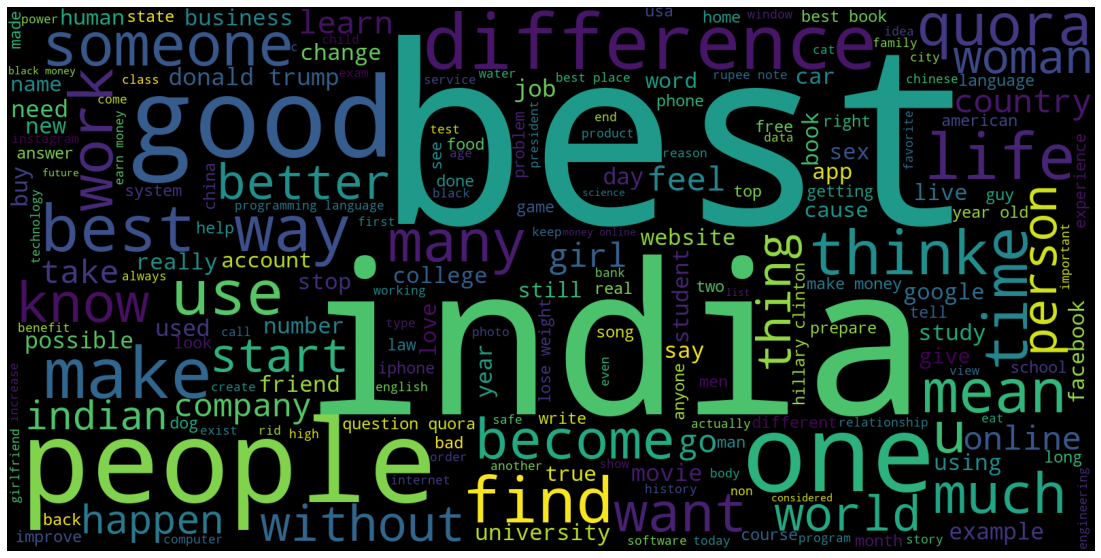

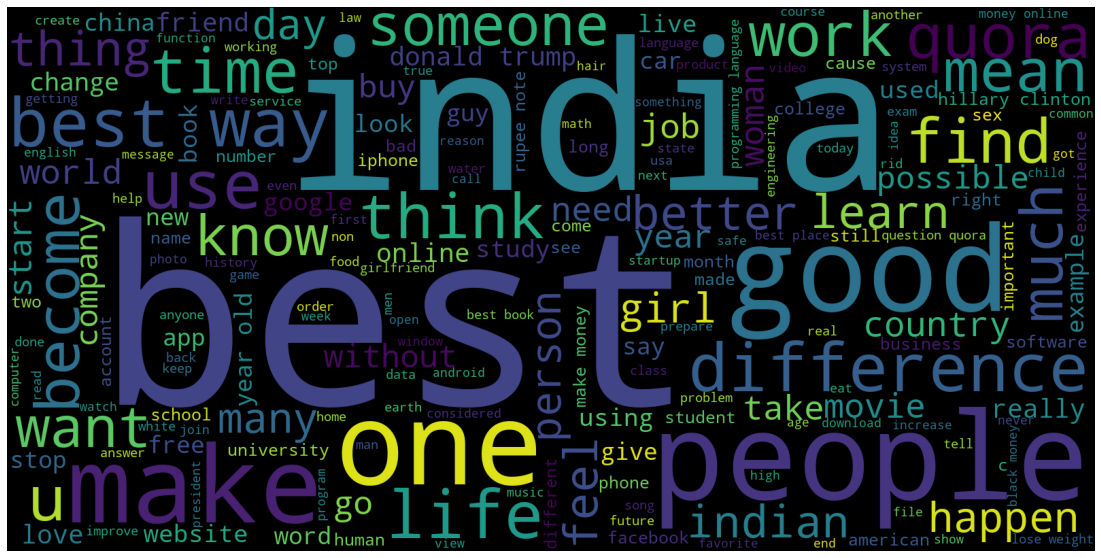

In [472]:
words = ' '.join(df['clean_q1_lemma'])
words1 = ' '.join(df['clean_q2_lemma'])
cleaned_word = " ".join([word for word in words.split()])
cleaned_word1 = " ".join([word for word in words1.split()])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word1)

plt.figure(1,figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

plt.figure(1,figsize=(20,10))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [473]:
df.isnull().sum()

clean_q1_lemma      0
q1_len_lemma        0
clean_q2_lemma      0
q2_len_lemma        0
is_duplicate        0
common_words        0
common_words_len    0
dtype: int64

<AxesSubplot:xlabel='common_words_len', ylabel='count'>

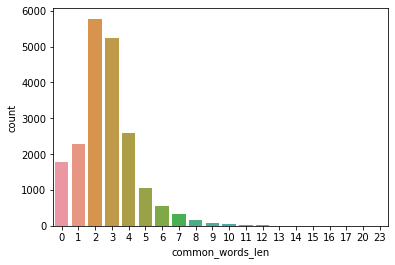

In [474]:
sns.countplot(x='common_words_len',data=df)

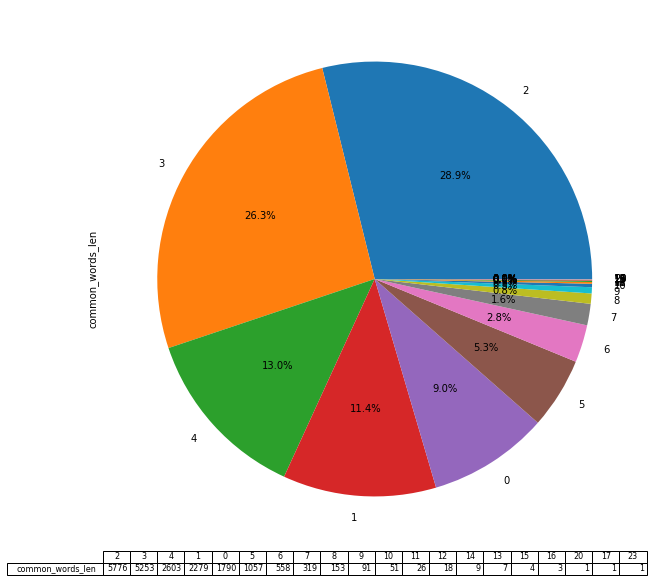

In [476]:
plt.figure(figsize=(10,10))
df.common_words_len.value_counts().plot(kind='pie', autopct='%1.1f%%', table = True)
plt.show()

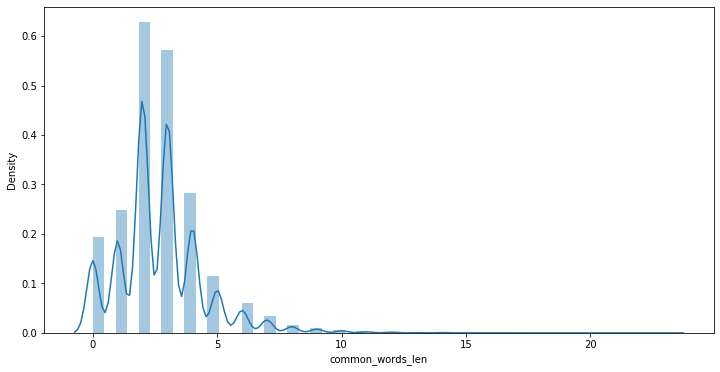


mean:  2.7154
median: 3.0
mode: 0    2
dtype: int64



In [477]:
plt.figure(figsize=(12,6))
sns.distplot(df['common_words_len'])
plt.show()
print()
print('mean: ',df['common_words_len'].mean())
print('median:',df['common_words_len'].median())
print('mode:',df['common_words_len'].mode())
print()

### Top 50 Common Questions
#### For Question1

In [479]:
most_common_questions = {}
for i in range(20000):
    if df['clean_q1_lemma'][i] in most_common_questions:
        most_common_questions[df['clean_q1_lemma'][i]] = most_common_questions[df['clean_q1_lemma'][i]] + df['q1_len_lemma'][i]
    else:
        most_common_questions[df['clean_q1_lemma'][i]] = (df['q1_len_lemma'][i])
combined=most_common_questions

In [480]:
# Importing the operator library

import operator

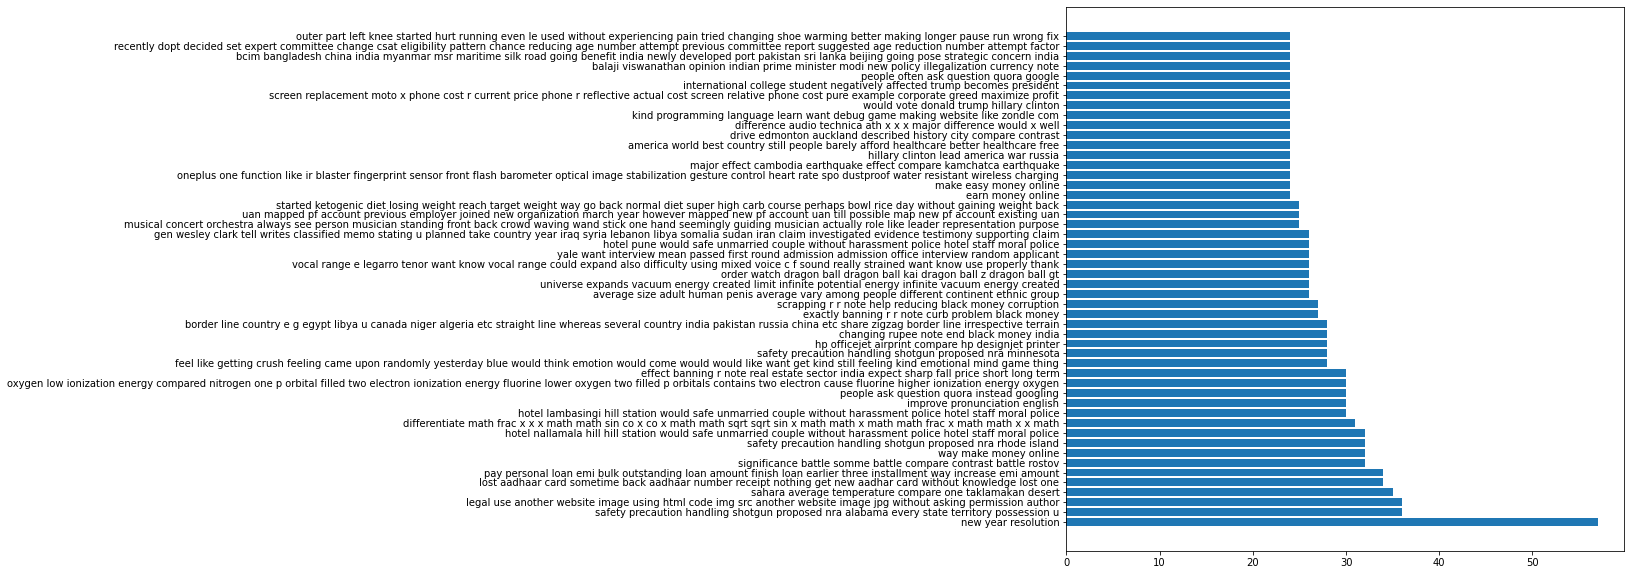

In [481]:
# Creating a songs_sorted variable

most_common_questions_sorted = dict(sorted(most_common_questions.items(), key=operator.itemgetter(1),reverse=True))
D = {}
for i in range(50):
    D[list(most_common_questions_sorted.keys())[i]]= (list(most_common_questions_sorted.values())[i])
plt.figure(figsize=(10,10))
plt.barh(*zip(*D.items()))
plt.show()

#### For question2

In [483]:
most_common_questions = {}
for i in range(20000):
    if df['clean_q2_lemma'][i] in most_common_questions:
        most_common_questions[df['clean_q2_lemma'][i]] = most_common_questions[df['clean_q2_lemma'][i]] + df['q2_len_lemma'][i]
    else:
        most_common_questions[df['clean_q2_lemma'][i]] = float(df['q2_len_lemma'][i])

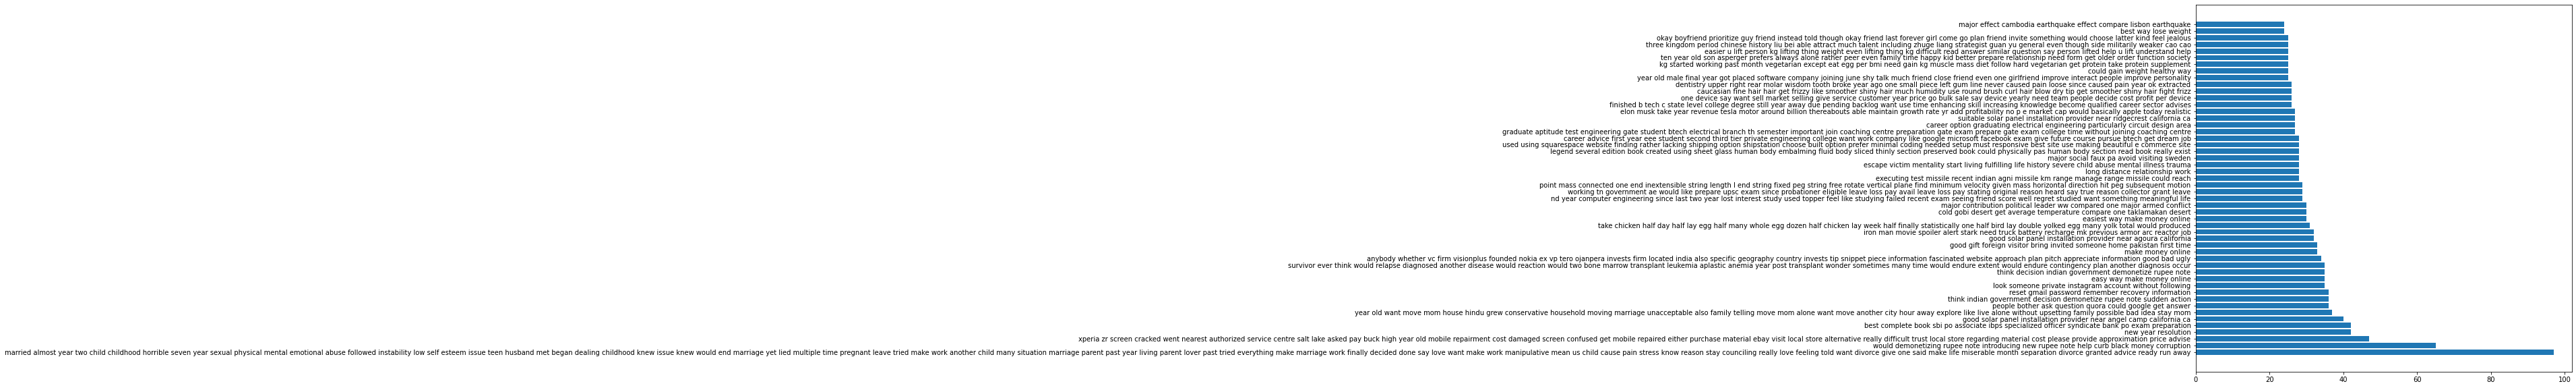

In [484]:
combined.update(most_common_questions)
most_common_questions_sorted = dict(sorted(most_common_questions.items(), key=operator.itemgetter(1),reverse=True))
D = {}
for i in range(50):
    D[list(most_common_questions_sorted.keys())[i]]= (list(most_common_questions_sorted.values())[i])
plt.figure(figsize=(10,10))
plt.barh(*zip(*D.items()))
plt.show()

#### Combined top 50 Questions

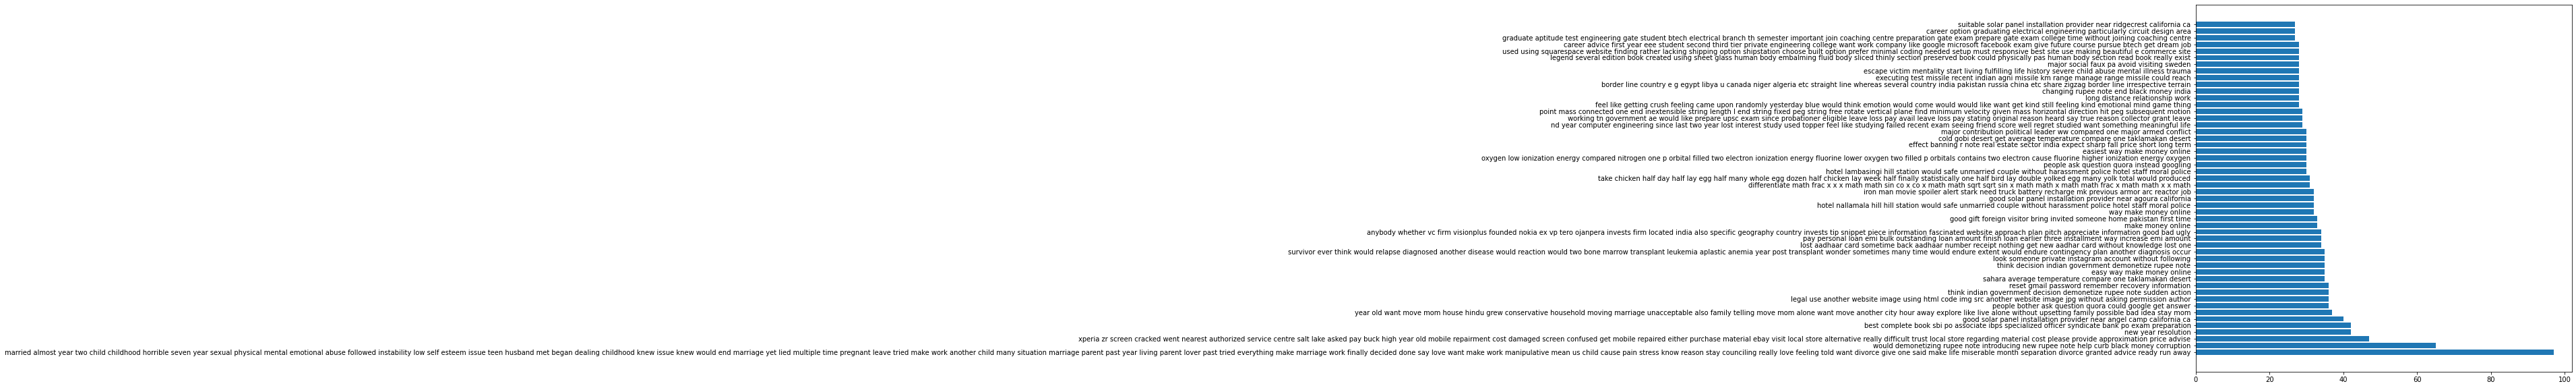

In [485]:
most_common_questions_sorted = dict(sorted(combined.items(), key=operator.itemgetter(1),reverse=True))
D = {}
for i in range(50):
    D[list(most_common_questions_sorted.keys())[i]]= (list(most_common_questions_sorted.values())[i])
plt.figure(figsize=(10,10))
plt.barh(*zip(*D.items()))
plt.show()

### 4. Data Preparation 
<p style = 'font-size:15px'>Now prepare the data and build a baseline linear model</p>

In [490]:
# Only keeping the necessary columns

df = df.loc[:, ['clean_q1_lemma', 'clean_q2_lemma', 'is_duplicate']]
df.head()

,clean_q1_lemma,clean_q2_lemma,is_duplicate
0,play pok mon go korea,play pok mon go china,0
1,best side dish crab cake,good side dish buffalo chicken,0
2,advisable better material crash test automobil...,best server setup buddypress,0
3,improve logical programming skill,improve logical skill programming,1
4,close see rd world war,close world war iii,1


#### Split the data into train-test

In [492]:
# Merging two question's columns, so that we can train the data efficiently

questions = df['clean_q1_lemma'] + ' ' + df['clean_q2_lemma']

df['questions'] = questions

# df.head()

,clean_q1_lemma,clean_q2_lemma,is_duplicate,questions
0,play pok mon go korea,play pok mon go china,0,play pok mon go korea play pok mon go china
1,best side dish crab cake,good side dish buffalo chicken,0,best side dish crab cake good side dish buffal...
2,advisable better material crash test automobil...,best server setup buddypress,0,advisable better material crash test automobil...
3,improve logical programming skill,improve logical skill programming,1,improve logical programming skill improve logi...
4,close see rd world war,close world war iii,1,close see rd world war close world war iii


In [493]:
df = df.loc[:, ['questions', 'is_duplicate']]
df.head()

,questions,is_duplicate
0,play pok mon go korea play pok mon go china,0
1,best side dish crab cake good side dish buffal...,0
2,advisable better material crash test automobil...,0
3,improve logical programming skill improve logi...,1
4,close see rd world war close world war iii,1


In [494]:
from sklearn.model_selection import train_test_split

X = df.drop('is_duplicate', axis=1)
y = df['is_duplicate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16000, 1) (16000,)
(4000, 1) (4000,)


In [495]:
X_train_lemma = []
X_test_lemma = []

for i in X_train['questions']:
    X_train_lemma.append(i)
    

for i in X_test['questions']:
    X_test_lemma.append(i)

### Converting text data into Vector using Bag-Of-Words, TF-IDF and Word2vec<br>

### Bag-Of-Words
<p style='font-size:16px'>Bag of words is a NLP technique or a method of feature extraction with text data. It is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. <br>We are using <b>CountVectorizer()</b> function from <b>sklearn library</b> to easily implement the BoW model.</p>

In [496]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For question 1

vectorizer = CountVectorizer(ngram_range=(2, 2))

train_features = vectorizer.fit_transform(X_train_lemma)

test_features = vectorizer.transform(X_test_lemma)

In [1]:
train_features.shape

NameError: name 'train_features' is not defined

In [497]:
# vectorizer.vocabulary_

In [498]:
bow_vec = pd.DataFrame(train_features.toarray(), columns = vectorizer.vocabulary_)

bow_vec.head()

,galaxy travel,travel faster,faster speed,speed light,light data,data travel,sometimes bf,bf say,say nice,nice thing,...,path take,take improve,english efficient,efficient method,method improve,major advantage,disadvantage diesel,engine diesel,engine heavier,heavier petrol
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p style='font-size:16px'><b>CountVectorizer()</b> converts the text data into Vector and it creates Compressed Sparse Row matrix or csr_matrix. The benefit of using csr_matrix is, <b>Storage:</b> There are lesser non-zero elements than zeros and thus lesser memory can be used to store only those elements.</p>

### TF-IDF

In [499]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(2, 2))

train_tfidf_features = tfidf_vectorizer.fit_transform(X_train_lemma)

test_tfidf_features = tfidf_vectorizer.transform(X_test_lemma)

len(tfidf_vectorizer.vocabulary_)

102961

In [500]:
tfidf_vec_df = pd.DataFrame(train_tfidf_features.toarray(), columns = tfidf_vectorizer.vocabulary_)

tfidf_vec_df.head()

,galaxy travel,travel faster,faster speed,speed light,light data,data travel,sometimes bf,bf say,say nice,nice thing,...,path take,take improve,english efficient,efficient method,method improve,major advantage,disadvantage diesel,engine diesel,engine heavier,heavier petrol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [501]:
# for Example
tfidf_vec_df['galaxy travel'].value_counts()

0.000000    15996
0.226939        1
0.644161        1
0.445990        1
0.521545        1
Name: galaxy travel, dtype: int64

In [502]:
print("Total unique words :", len(tfidf_vectorizer.vocabulary_))

print("\nType of train_features:", type(train_tfidf_features))     

print("\nShape of input data :", train_tfidf_features.shape)

Total unique words : 102961

Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>

Shape of input data : (16000, 102961)


### Model Building using Logistic Regression

In [506]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
# Performing Hyperparameter Tuning &
# Training the Model using Accuracy as the evaluation metric

tune_parameters = [{'C': [0.3, 0.1, 0.5]}]

model_1 = GridSearchCV(LogisticRegression(), tune_parameters, scoring='accuracy')

model_1.fit(train_tfidf_features.toarray(), y_train)

In [ ]:
print("Best parameters set found on train set :")

print(model_1.best_params_)
print(model_1.best_estimator_)
print(model_1.best_score_)

print('\nAccuracy :', model_1.score(test_tfidf_features, y_test))

In [504]:
# model_1 = LogisticRegression()

# model_1.fit(train_tfidf_features.toarray(), y_train)

# pred = model_1.predict(test_tfidf_features)

# accuracy = accuracy_score(pred, X_test['is_duplicate'])

# print('Accuracy :',accuracy)

Accuracy : 0.70425
